Immunodeconvolution
===================

In [28]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(immunedeconv)
library(tibble)

Warning message:
“package ‘dplyr’ was built under R version 4.0.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggplot2’ was built under R version 4.0.3”
Warning message:
“package ‘tibble’ was built under R version 4.0.3”


In [48]:
library(repr)
options(repr.plot.width=15, repr.plot.height=12)

In [2]:
data_path <- file.path("/data")
embed_path <- file.path(data_path, "samples", "EMBED")
embed_analysis_path <- file.path(embed_path, "ANALYSIS")
list.files(embed_analysis_path)



[1] "dep_down.csv"        "dep_up.csv"          "GSE101521"          
[4] "GSE102556"           "GSE113798"           "GSE113798_GSE113801"
[7] "sample_list.csv"     "table_genes.csv"     "table.csv"

In [3]:
embed_analysis_path

[1] "/data/samples/EMBED/ANALYSIS"

In [4]:
sex_specific_counts_path = file.path(embed_analysis_path, "GSE102556", "counts")
b_cell_path = file.path(embed_analysis_path, "GSE113798_GSE113801", "counts")
brain_path = file.path(embed_analysis_path, "GSE101521")



B cells
-------

In [5]:
b_cell_path

[1] "/data/samples/EMBED/ANALYSIS/GSE113798_GSE113801/counts"

In [26]:
b_cell_frame = read.csv("/data/samples/EMBED/ANALYSIS/GSE113798_GSE113801/counts/table_symbol_tpm.csv",header = TRUE, row.names = 1 , stringsAsFactors = FALSE)
b_cell = as.matrix(b_cell_frame)
b_cell

Warning message in file(file, "rt"):
“cannot open file '/data/samples/EMBED/ANALYSIS/GSE113798_GSE113801/counts/table_symbol_tpm.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [47]:
b_cell_quantiseq  = deconvolute(b_cell, "quantiseq", tumor = FALSE)
b_cell_mcp_counter  = deconvolute(b_cell, "mcp_counter", tumor = FALSE)
b_cell_xcell  = deconvolute(b_cell, "xcell", tumor = FALSE)
b_cell_epic  = deconvolute(b_cell, "epic", tumor = FALSE)



>>> Running quantiseq


Running quanTIseq deconvolution module


Gene expression normalization and re-annotation (arrays: FALSE)


Removing 17 noisy genes


Signature genes found in data set: 149/153 (97.39%)


Mixture deconvolution (method: lsei)


Deconvolution sucessful!


>>> Running mcp_counter


>>> Running xcell


>>> Running epic



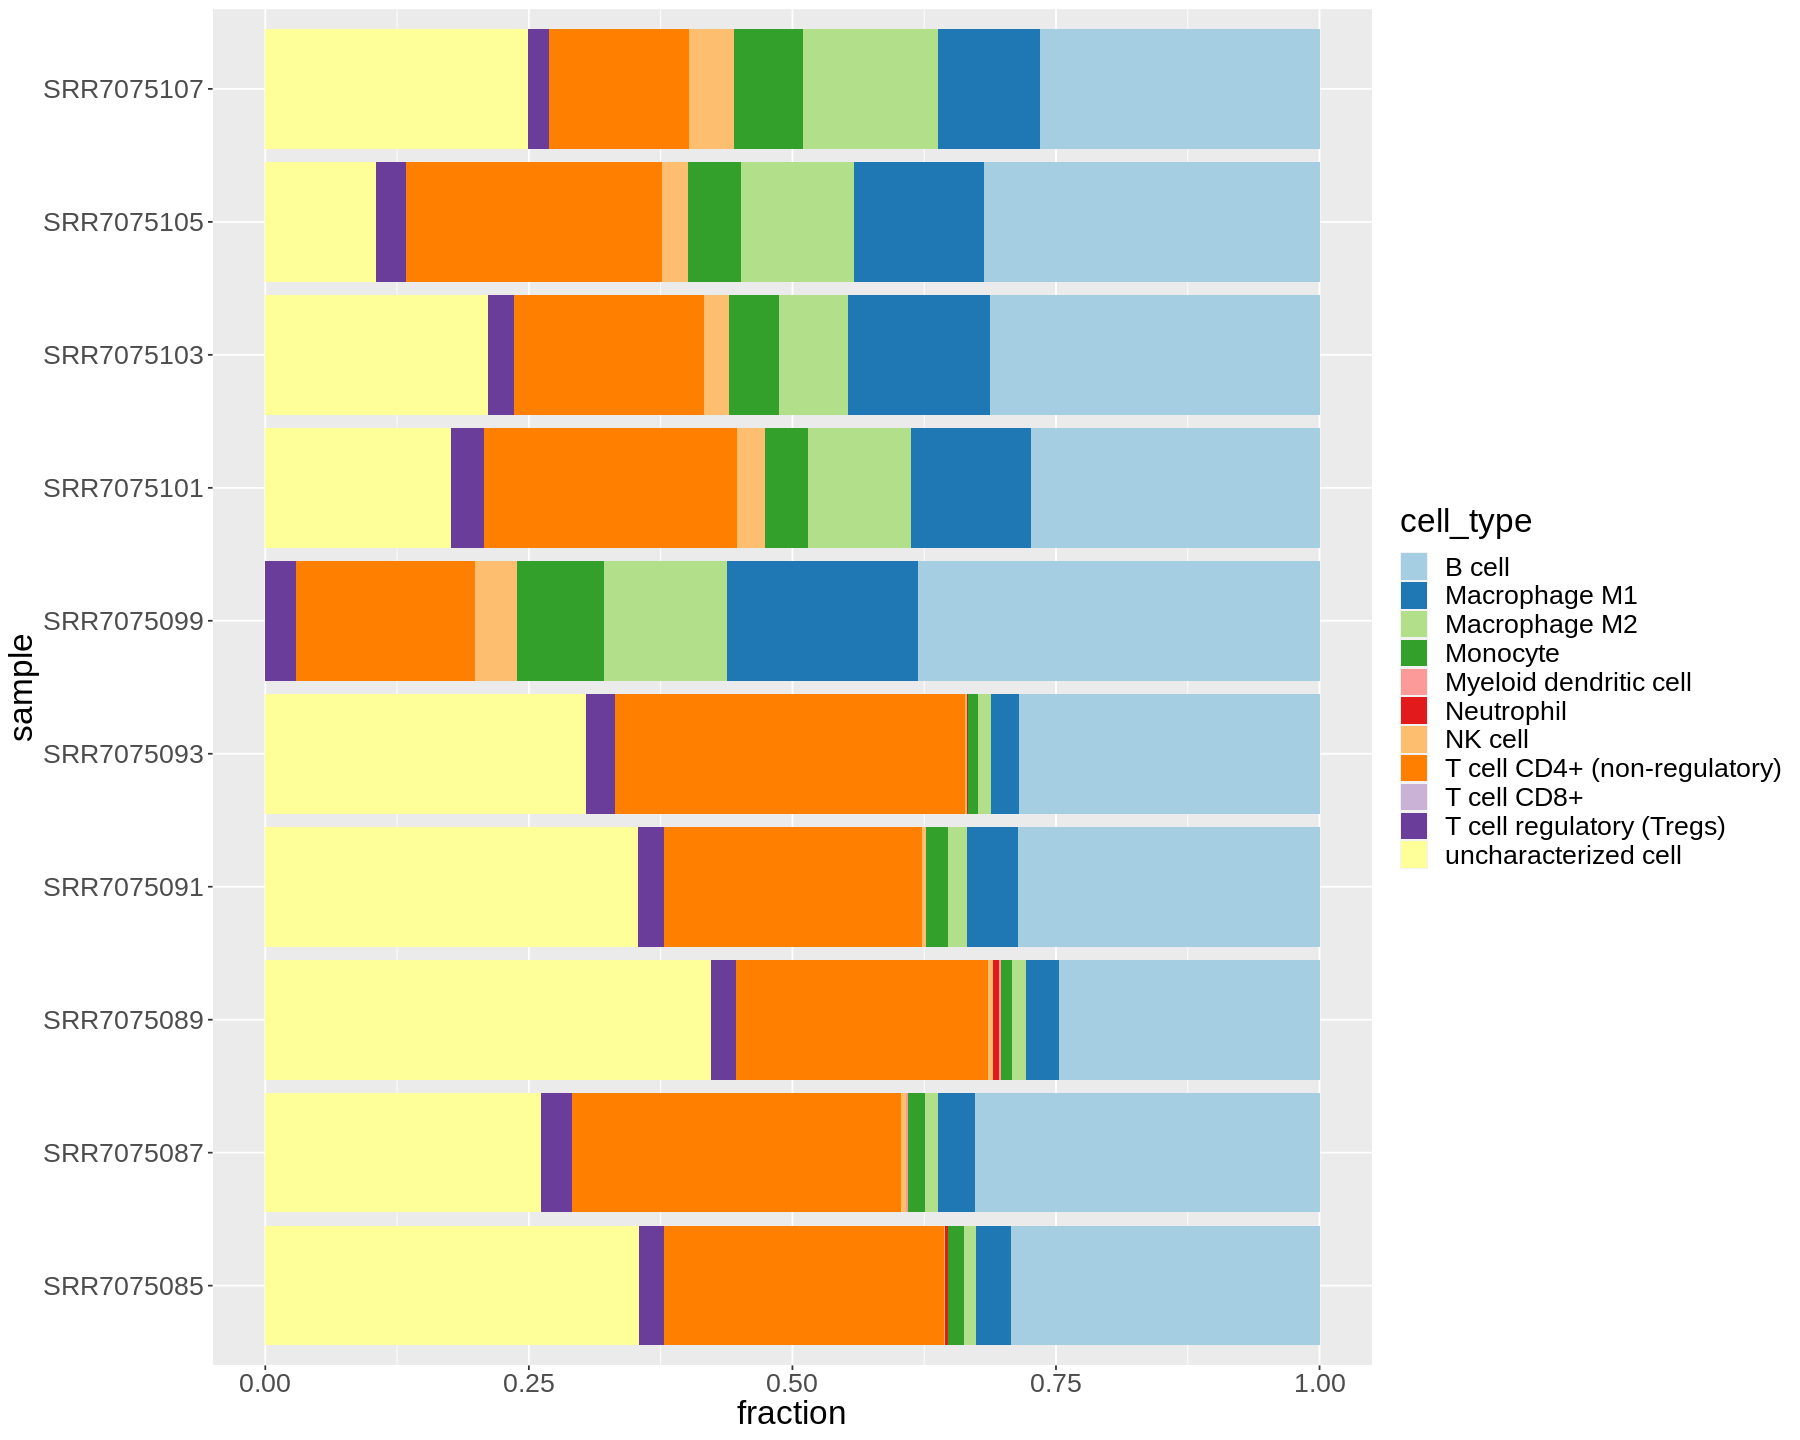

In [46]:
res_quantiseq %>%
  gather(sample, fraction, -cell_type) %>%
  # plot as stacked bar chart
  ggplot(aes(x=sample, y=fraction, fill=cell_type)) +
    geom_bar(stat='identity') +
    coord_flip() +
    scale_fill_brewer(palette="Paired") +
    scale_x_discrete(limits = rev(levels(res_quantiseq)))  + theme(text = element_text(size = 20))  

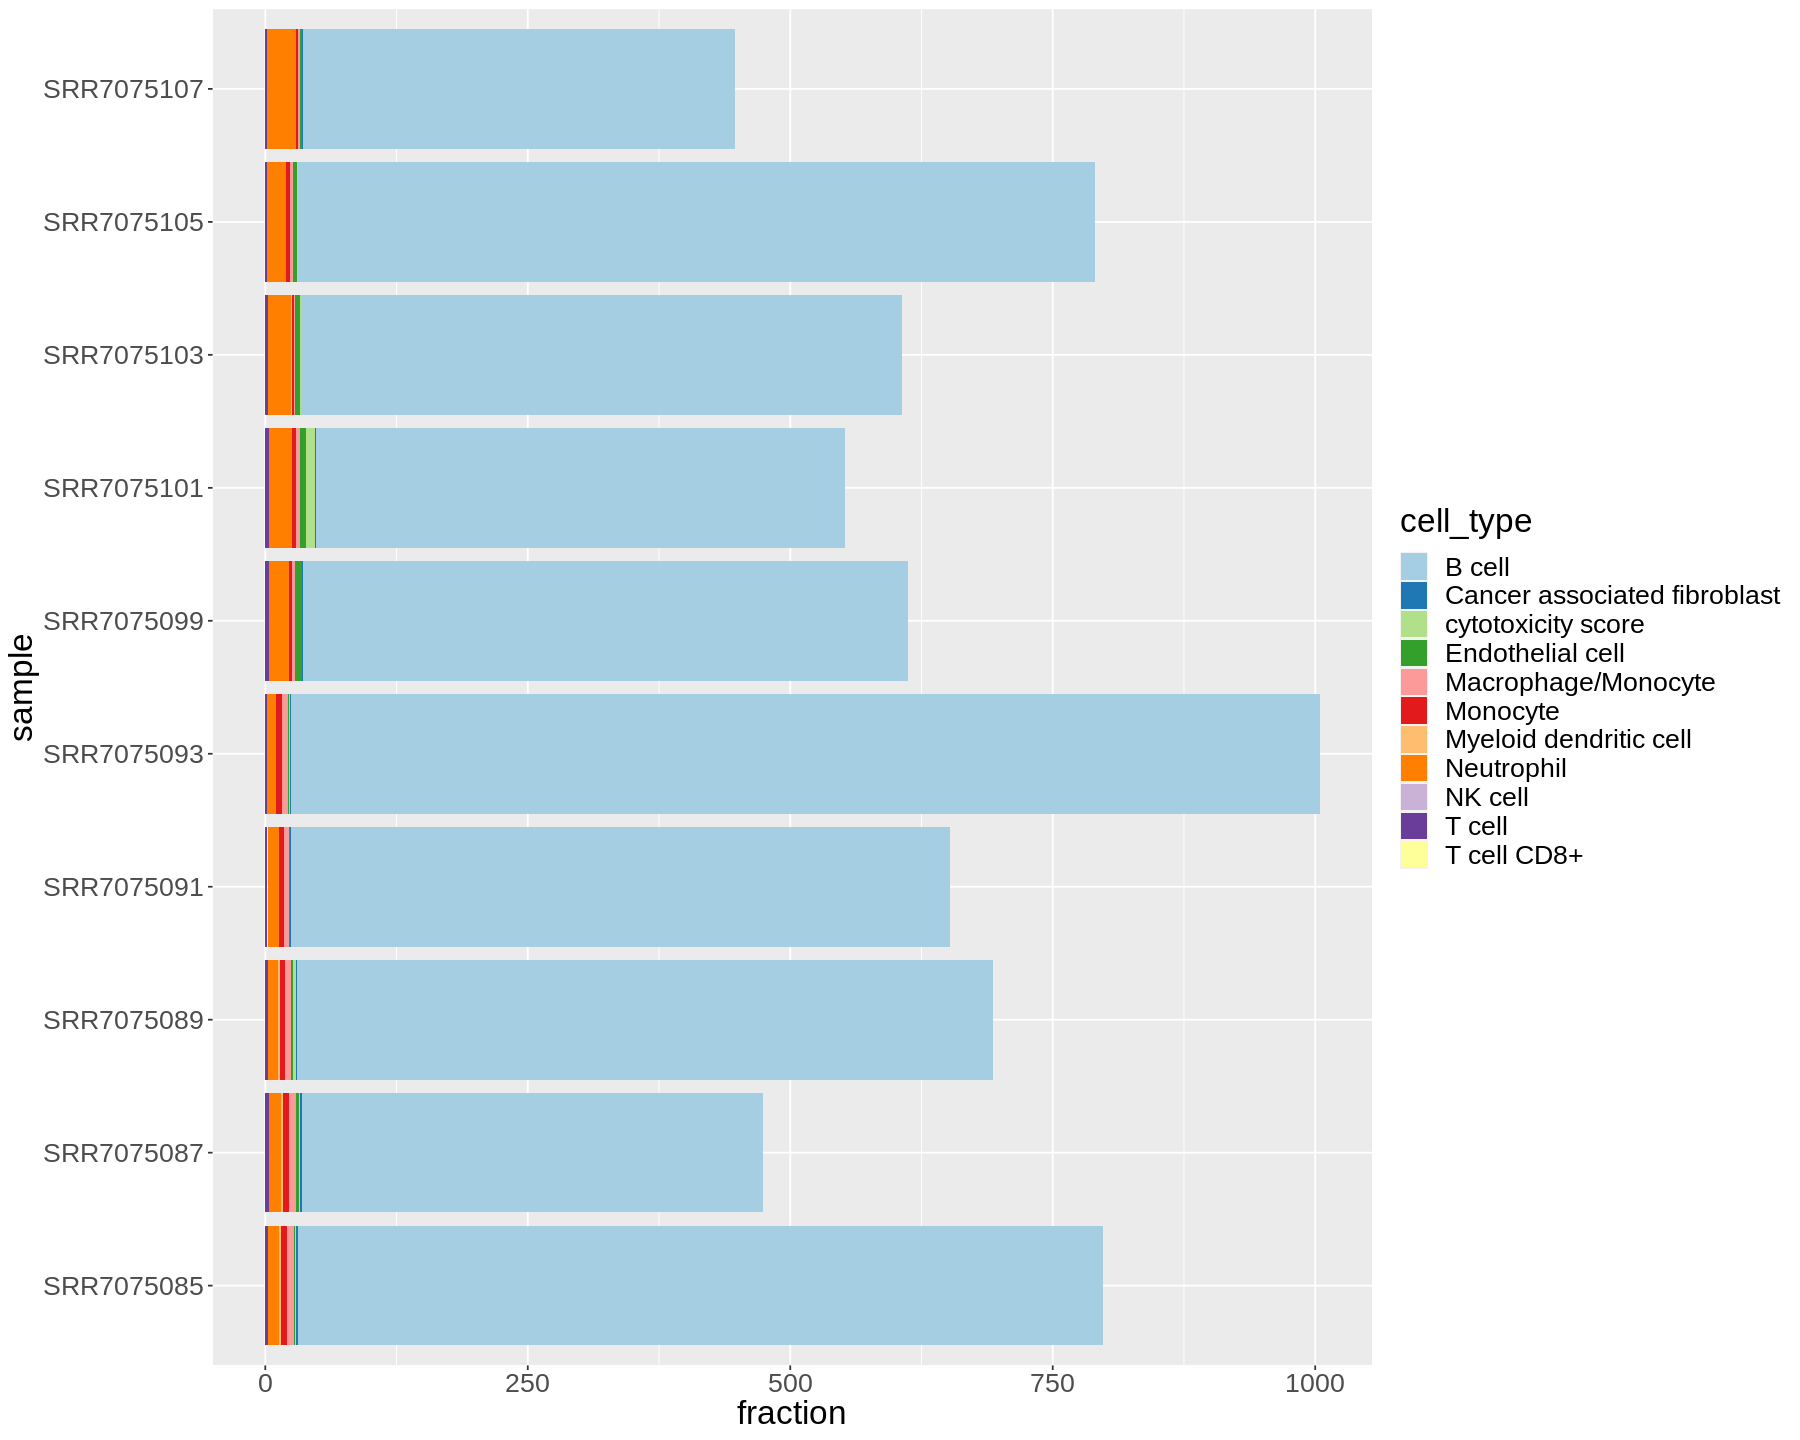

In [51]:
b_cell_mcp_counter %>%
  gather(sample, fraction, -cell_type) %>%
  # plot as stacked bar chart
  ggplot(aes(x=sample, y=fraction, fill=cell_type)) +
    geom_bar(stat='identity') +
    coord_flip() +
    scale_fill_brewer(palette="Paired") +
    scale_x_discrete(limits = rev(levels(b_cell_mcp_counter)))  + theme(text = element_text(size = 20))  

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


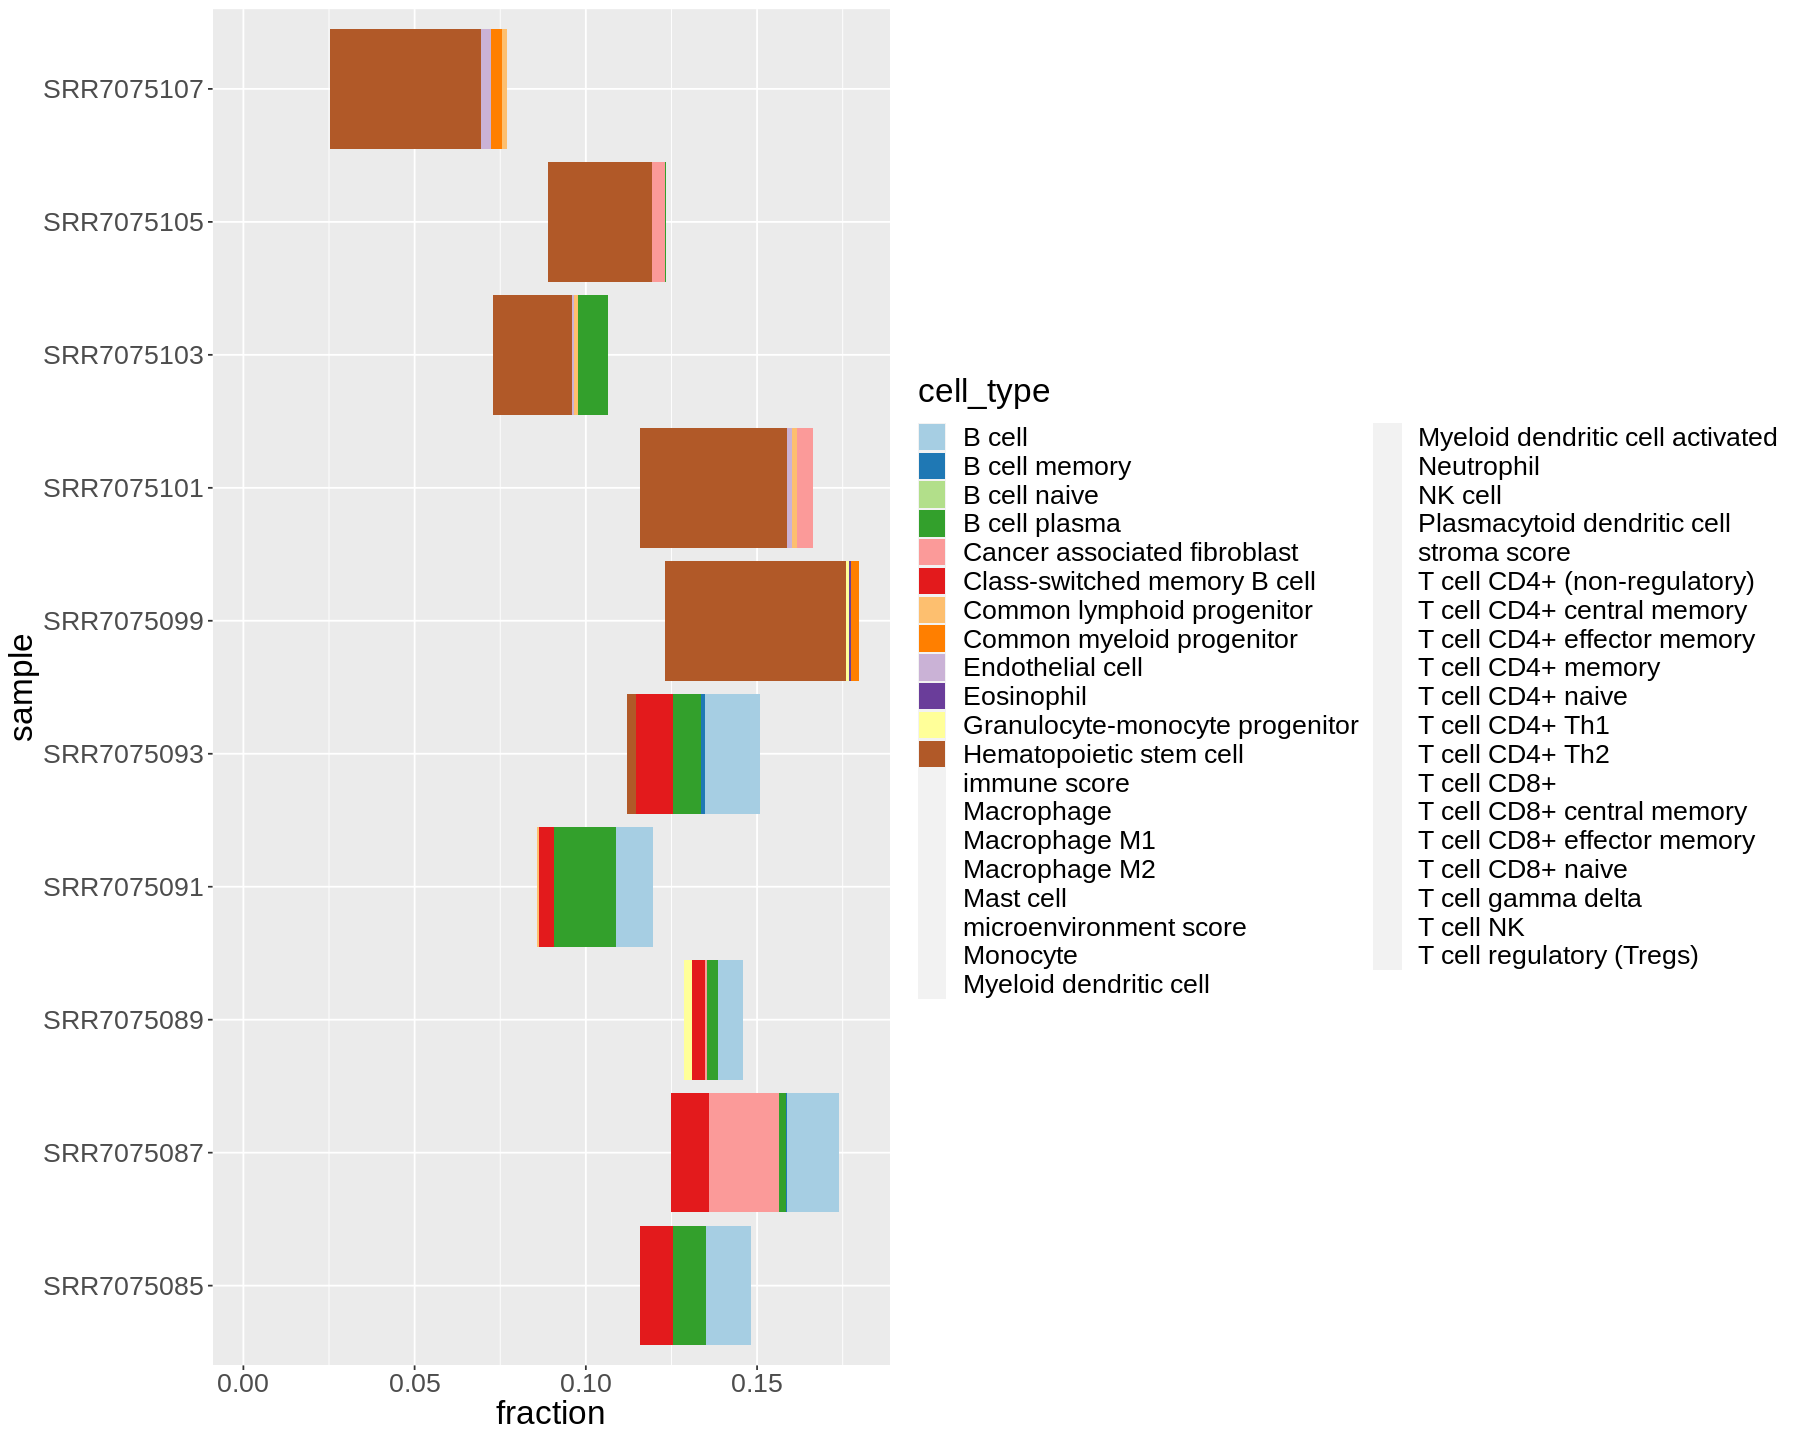

In [52]:
b_cell_xcell %>%
  gather(sample, fraction, -cell_type) %>%
  # plot as stacked bar chart
  ggplot(aes(x=sample, y=fraction, fill=cell_type)) +
    geom_bar(stat='identity') +
    coord_flip() +
    scale_fill_brewer(palette="Paired") +
    scale_x_discrete(limits = rev(levels(b_cell_xcell)))  + theme(text = element_text(size = 20))  

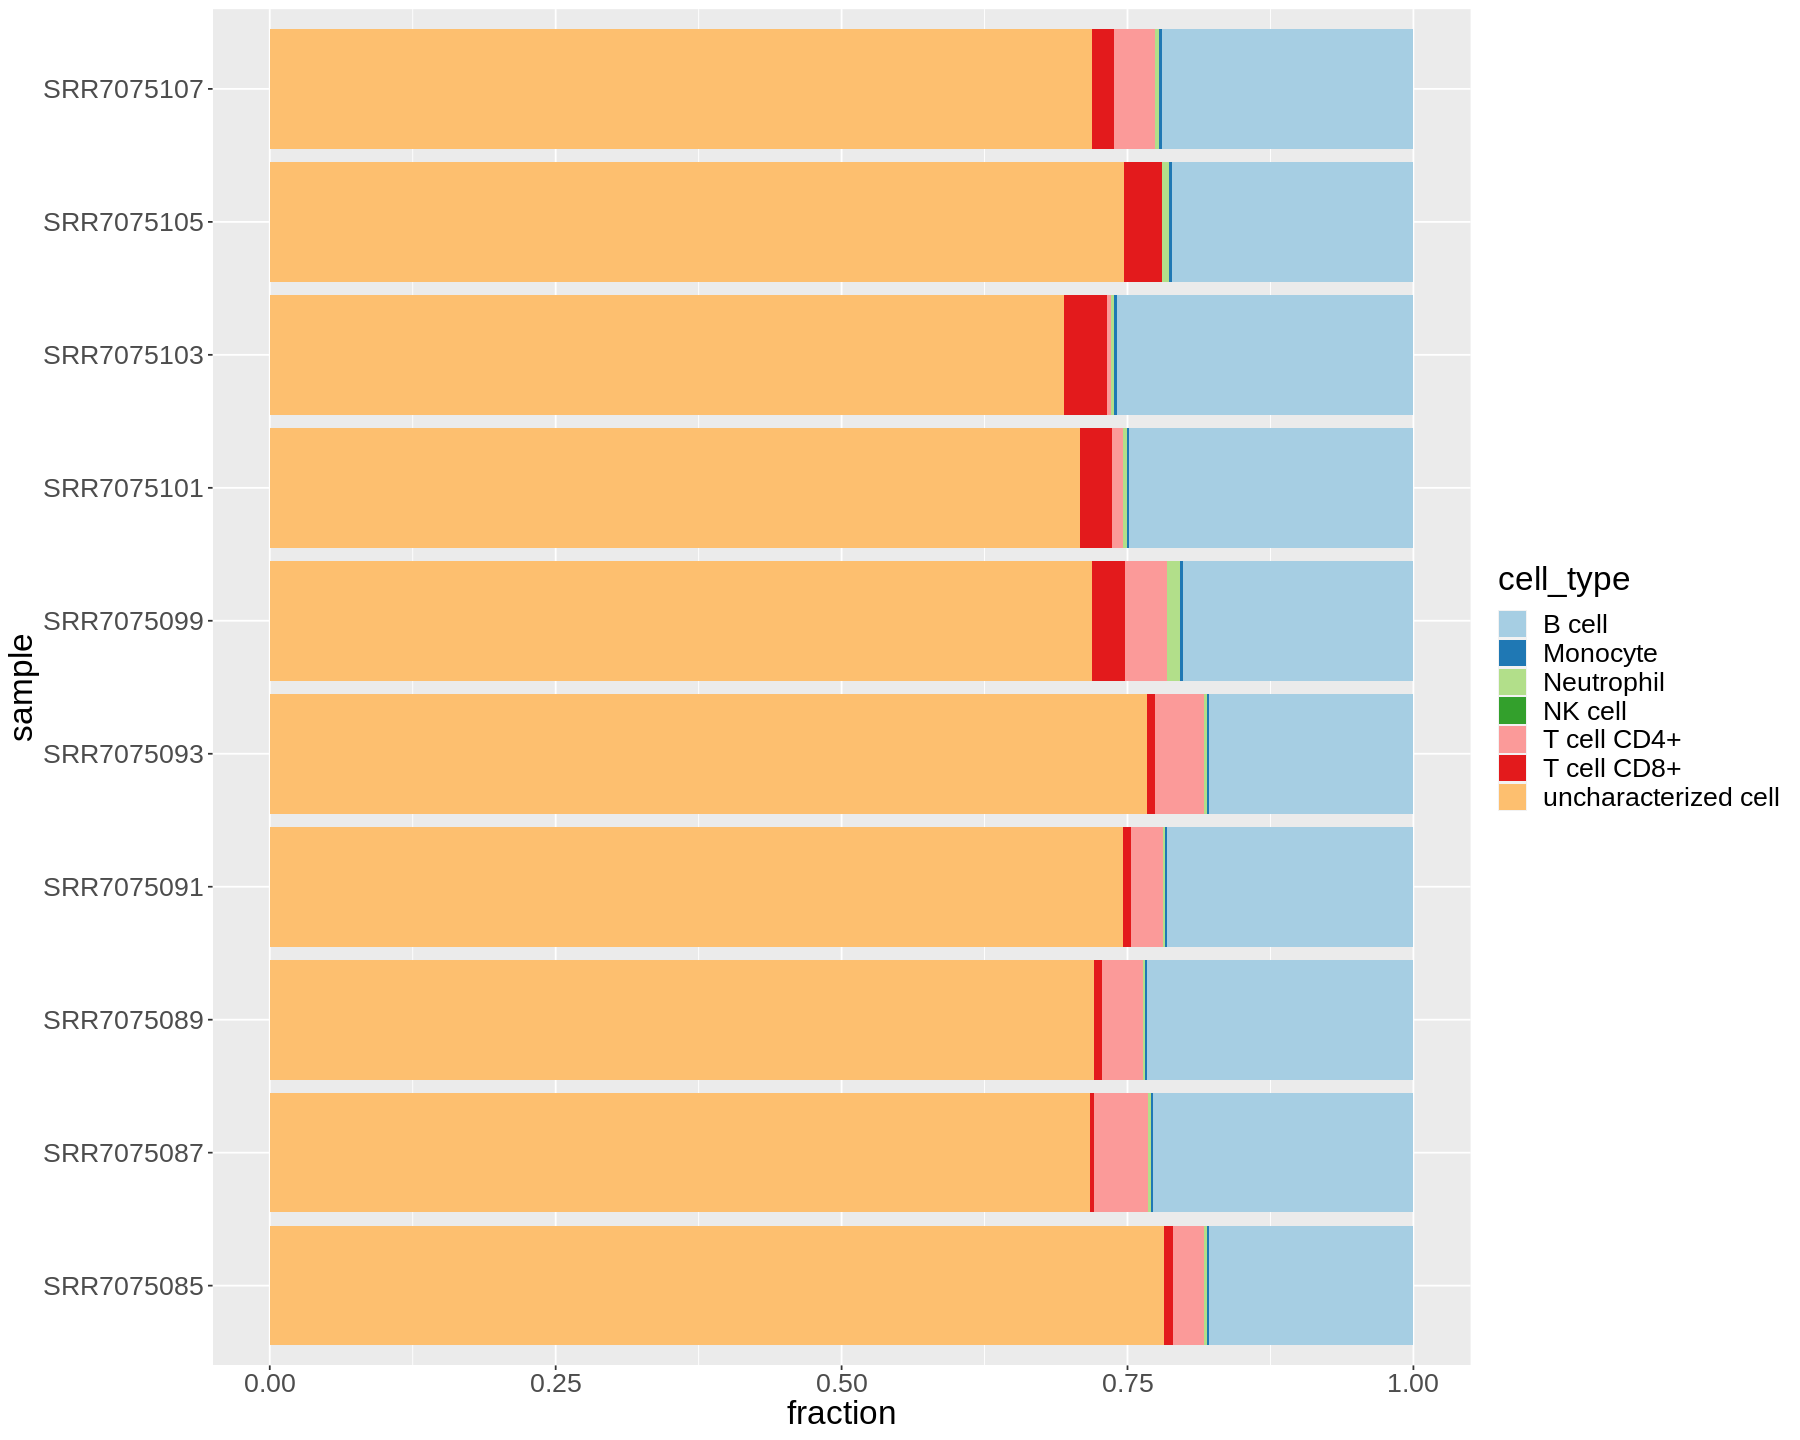

In [53]:
b_cell_epic %>%
  gather(sample, fraction, -cell_type) %>%
  # plot as stacked bar chart
  ggplot(aes(x=sample, y=fraction, fill=cell_type)) +
    geom_bar(stat='identity') +
    coord_flip() +
    scale_fill_brewer(palette="Paired") +
    scale_x_discrete(limits = rev(levels(b_cell_epic)))  + theme(text = element_text(size = 20))  

Sex specific
==============

In [56]:
read.csv(file.path(sex_specific_counts_path))

Warning message in file(file, "rt"):
“'raw = FALSE' but '/data/samples/EMBED/ANALYSIS/GSE102556/counts' is not a regular file”
Warning message in file(file, "rt"):
“cannot open file '/data/samples/EMBED/ANALYSIS/GSE102556/counts': it is a directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [1]:
sex_specific = as.matrix(read.csv(file.path(sex_specific_counts_path, 'general', "table_symbol_tmp.csv")))
sex_specific

ERROR: Error in file.path(sex_specific_counts_path, "general", "table_symbol_tmp.csv"): object 'sex_specific_counts_path' not found


In [ ]:
res = deconvolute(sex_specific, "quantiseq")
knitr::kable(res, digits=2)


>>> Running quantiseq


Running quanTIseq deconvolution module




In [16]:
dataset_racle$expr_mat

,LAU125,LAU355,LAU1255,LAU1314
A1BG,0.82,0.58,0.81,0.71
A1CF,0.00,0.01,0.00,0.00
A2M,247.15,24.88,2307.94,20.30
A2M-AS1,1.38,0.20,2.60,0.28
A2ML1,0.03,0.00,0.05,0.02
A3GALT2,0.00,0.00,0.00,0.00
A4GALT,0.17,0.96,0.03,1.70
A4GNT,0.09,0.00,0.05,0.01
AAAS,20.90,15.68,14.09,19.17
AACS,10.14,3.87,3.08,5.39
